# Analysis of December Experiments - Actin Channel

<font size = 4>1. Compared Actin vs  Actin (<30%) for chromocenter dots/nuclei ratio 
    
<font size = 4>2. Compared Actin vs Actin (<30%) for chromocenter dots
                                                 
Parameters **Chromocenter Volume**,**Nuclei Volume** and **Actin Coverage**
                                                 
Timestamp - **T0** - Chromocenter segmentation is tricky as they are not formed
                                                 
-**T30** - Chromocenter dots appear and Actin is imaged     
                                                 
-**T60** - Chromocenter dots are saturated (T60 can be ignored)  
                                                 
Timestamp - **Compared Shrinking vs Growing Nuclei**
    
-**Shrinking Nuclei** - Where nuclei shrinks at T60/T30 with T0 reference i.e (less than 1.2 in ratio)
                                                 
-**Non-Shrinking Nuclei** - Where nuclei grows at T60/T30 with T0 reference i.e (more than 1.2 in ratio)
                                         

# Analysis of Actin vs Actin less than 30%
    
<font size = 4>Compared difference of chromocenter volume (<30%)
                                                                                                                        
**Two plots**                                                     
Categorized in **Shrinking Nuclei** vs **Non-Shrinking Nuclei**                                    

# Analysis of Coverage Ratio - Actin vs Actin less than 30% 
    
<font size = 4>Compared difference of (chromocenter volume/nuclei -chromocenter volume[T0]/nuclei[T0]) for two conditions 

**Two Plots**    
Categorized in **Shrinking Nuclei** vs **Non-Shrinking Nuclei**                                           

4


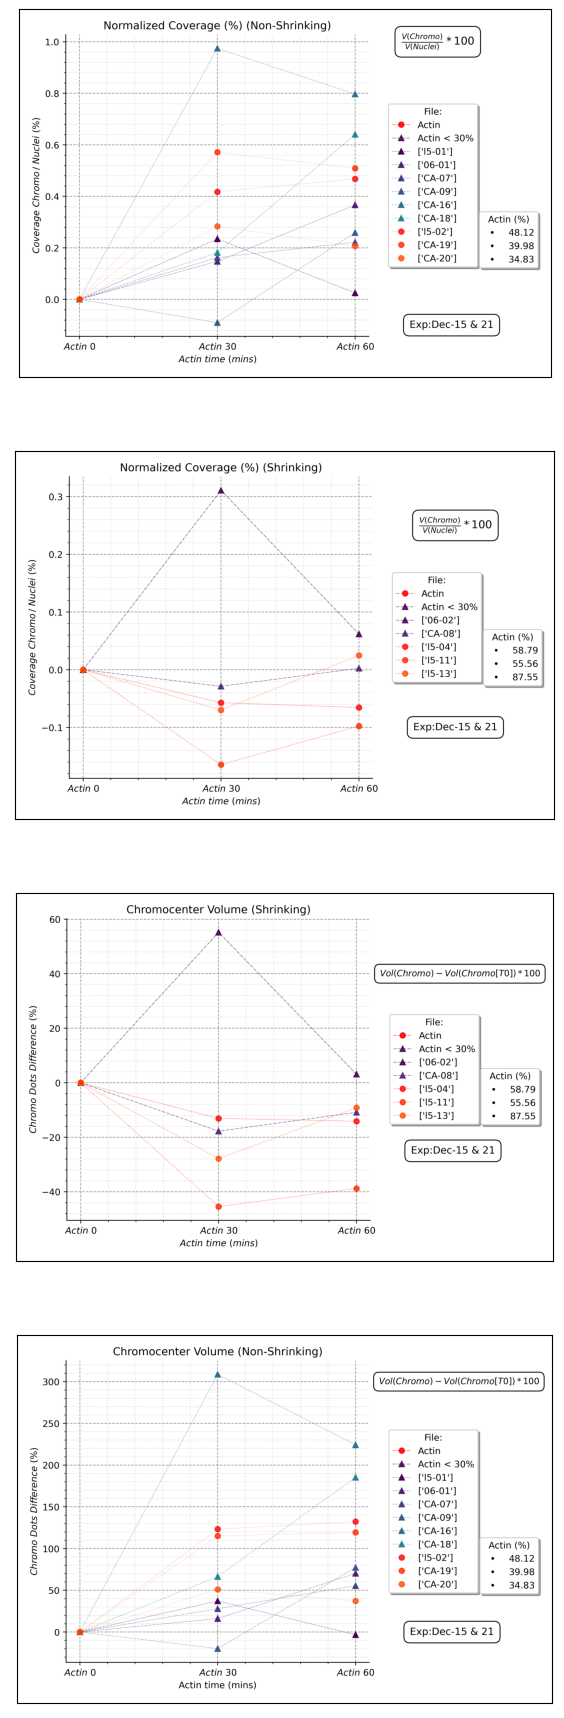

In [71]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in sorted(glob.glob('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/ActinO30 vs ActinL30/Plots/*.png')):
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize=(22,22))
columns = 1
for i, image in enumerate(images):
    plt.subplot(int(len(images)/columns),columns, i+1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
